In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import random
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
def evaluation(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        plt.plot(recall, precision)
        plt.show()
    print(f'l''aire sous la courbe{value}')
    print(f'le f1_score est{f1_score}')
    print(f'la precision est{precision}')
    print(f'le recall est{recall}')
    return value, f1_score, precision, recall

In [3]:
# Lecture du fichier de donnée
data_v0 = pd.read_csv(r"C:\Users\Utilisateur\Desktop\Projet_interpromo_2k22\ProjectInterPromo\data\Donnees_v0_NAN_remplaces.csv")

print("Nombre de fraude :", sum(data_v0["TOP_FRAUDE"]))
print("Nombre de données : ", len(data_v0))
print("Ratio : ", sum(data_v0["TOP_FRAUDE"]) / len(data_v0) * 100)

# Suppression des variables qualitative
quali_col = []
count = 0
for i, name in zip(data_v0.dtypes, data_v0.columns):
    if i == "object":
        quali_col.append(name)

data_quanti = data_v0.drop(columns=quali_col + ["Unnamed: 0"])

# 
data_quanti = data_quanti.sample(100000)

print("------------ Sur un echantillion ------------")
print("Nombre de fraude :", sum(data_quanti["TOP_FRAUDE"]))
print("Nombre de données : ", len(data_quanti))
print("Ratio : ", sum(data_quanti["TOP_FRAUDE"]) / len(data_quanti) * 100)

Nombre de fraude : 1618
Nombre de données :  849346
Ratio :  0.1904995137435156
------------ Sur un echantillion ------------
Nombre de fraude : 186
Nombre de données :  100000
Ratio :  0.186


# Prediction Aléatoire

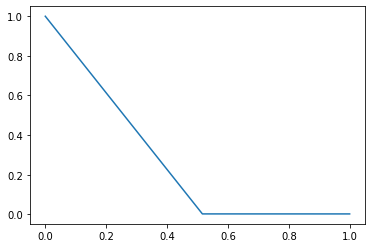

laire sous la courbe{value}
le f1_score est[0.00371309 0.00383195 0.        ]
la precision est[0.00186    0.00192312 1.        ]
le recall est[1.         0.51612903 0.        ]


(0.2594760738525444,
 array([0.00371309, 0.00383195, 0.        ]),
 array([0.00186   , 0.00192312, 1.        ]),
 array([1.        , 0.51612903, 0.        ]))

In [4]:
# comparaison a la prédiction aléaotire
n = len(data_quanti)
y = np.random.choice(2,n) 
evaluation(y , data_quanti['TOP_FRAUDE'] , True)

#  Modèle 1 : 

In [5]:
data_quanti.columns

Index(['TOP_FRAUDE', 'TOP_FRAUDE_CARTE', 'TOP_FRAUDE_VIREMENT', 'TOP_E_RELEVE',
       'MESSAGERIE_WEB_ACTIVE', 'FIAB_TEL_DOMICILE', 'FIAB_TEL_TRAVAIL',
       'FIAB_TEL_PORTABLE', 'FIAB_EMAIL', 'REFUS_SEA',
       ...
       'top_produit_Credit', 'top_produit_Epargne', 'top_produit_Services',
       'mt_factu_ttc_M', 'mt_factu_ttc_M6', 'mt_reduc_ttc_M',
       'mt_reduc_ttc_M6', 'mt_rist_ttc_M', 'mt_rist_ttc_M6',
       'Flag_bq_principale'],
      dtype='object', length=231)

In [6]:
data_quanti = data_quanti.drop([ 'TOP_FRAUDE_CARTE', 'TOP_FRAUDE_VIREMENT'], 1)

In [101]:
model=IsolationForest(n_estimators=200, max_samples='auto', contamination=float(0.05),max_features=1.0)
model.fit(data_quanti.drop('TOP_FRAUDE', 1))

IsolationForest(contamination=0.05, n_estimators=200)

In [102]:
df = data_quanti[['TOP_FRAUDE']]
df['scores']=model.decision_function(df[['TOP_FRAUDE']])
df['anomaly']=model.predict(df[['TOP_FRAUDE']])

ValueError: Number of features of the model must match the input. Model n_features is 228 and input n_features is 1.

evaluation du modèle

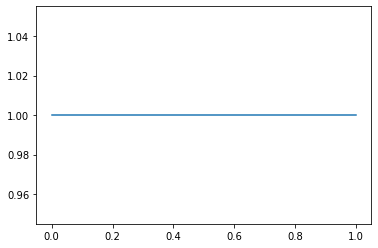

laire sous la courbe{value}
le f1_score est[1. 0.]
la precision est[1. 1.]
le recall est[1. 0.]


(1.0, array([1., 0.]), array([1., 1.]), array([1., 0.]))

In [97]:
df.reindex(data_quanti.index)
scores = df['scores'].apply(lambda x : np.abs(x))
evaluation(scores, data_quanti['TOP_FRAUDE'] , True)

# Modèle 2

In [8]:
from sklearn.ensemble import IsolationForest
X = data_quanti.drop(['TOP_FRAUDE'] , 1)
clf = IsolationForest(random_state=0).fit(X)
predic_forest=clf.predict(X)

In [13]:
def remplacement(liste):
    for i in range(len(liste)):
        if liste[i] == -1:
            liste[i] =0
    return liste

score = remplacement(predic_forest)

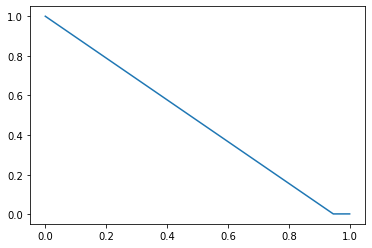

laire sous la courbe{value}
le f1_score est[0.00371309 0.00354646 0.        ]
la precision est[0.00186    0.00177656 1.        ]
le recall est[1.         0.94623656 0.        ]


(0.47405655832791727,
 array([0.00371309, 0.00354646, 0.        ]),
 array([0.00186   , 0.00177656, 1.        ]),
 array([1.        , 0.94623656, 0.        ]))

In [17]:
evaluation(score , data_quanti['TOP_FRAUDE'] , True)